In [1]:
import numpy as np
import torch
import torch.nn as nn
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from src.dnn import *
from tqdm.notebook import tqdm
%matplotlib notebook
#%load_ext autoreload
#%autoreload 2

In [2]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
z = x@beta
y = 0.8*np.exp(-(z**2)/0.1) + 0.1

In [3]:
def identity(z):
    return z

In [4]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = CLayer(n_inputs=3, n_outputs=2, scale = 1, activation = torch.tanh)
layer2 = CLayer(n_inputs=2, n_outputs=1, scale = 1, activation = identity)
layers = [layer1, layer2]

optimizer = Adam(lr=0.01)
network = QNN(layers, optimizer)

<IPython.core.display.Javascript object>


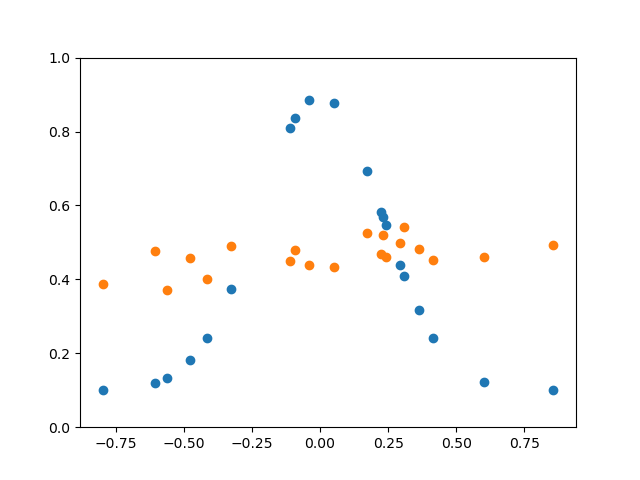

[0.87909675]
[0.85630137]
[0.83709]
[0.81992084]
[0.80408716]
[0.79298466]
[0.7820953]
[0.77132136]
[0.7605932]
[0.74985915]
[0.73907983]
[0.7282245]
[0.7172688]
[0.70619345]
[0.6949828]
[0.6836246]
[0.67210937]
[0.6604298]
[0.6485806]
[0.6365587]
[0.62436235]
[0.61199164]
[0.5994482]
[0.58673495]
[0.5740949]
[0.56179106]
[0.5498463]
[0.5382842]
[0.5286809]
[0.51936466]
[0.5103499]
[0.5016518]
[0.49328545]
[0.4852658]
[0.4776076]
[0.48247555]
[0.47511002]
[0.46767455]
[0.460168]
[0.46569577]
[0.45812273]
[0.45047432]
[0.4427495]
[0.44894987]
[0.44114956]
[0.43326652]
[0.42530328]
[0.43454328]
[0.4202762]
[0.42988297]
[0.41485626]
[0.4248311]
[0.40902936]
[0.41937527]
[0.4027842]
[0.4135037]
[0.39611012]
[0.40720502]
[0.38899702]
[0.4004691]
[0.3814361]
[0.39415067]
[0.37433928]
[0.3886598]
[0.36630702]
[0.38076657]
[0.36207974]
[0.38145214]
[0.36253896]
[0.3821484]
[0.36301482]
[0.38285497]
[0.3635069]
[0.38356817]
[0.36401176]
[0.37908173]
[0.35963205]
[0.37982634]
[0.36018747]
[0.380

[0.34301502]
[0.39763957]
[0.34298587]
[0.39766985]
[0.3429568]
[0.39770004]
[0.3429278]
[0.39773017]
[0.34289894]
[0.3977602]
[0.34287012]
[0.39779013]
[0.34284142]
[0.39782]
[0.34281278]
[0.3978497]
[0.34278426]
[0.39787936]
[0.3427558]
[0.39790893]
[0.34272745]
[0.39793843]
[0.34269917]
[0.39796782]
[0.34267104]
[0.39799714]
[0.34264293]
[0.39802635]
[0.34261492]
[0.3980555]
[0.342587]
[0.39808452]
[0.34255916]
[0.3981135]
[0.34253144]
[0.39814237]
[0.34250376]
[0.39817113]
[0.3424762]
[0.39819986]
[0.3424487]
[0.39822844]
[0.34242126]
[0.398257]
[0.34239393]
[0.39828542]
[0.3423667]
[0.39831376]
[0.34233955]
[0.39834207]
[0.34231248]
[0.39837024]
[0.34228548]
[0.39839834]
[0.34225857]
[0.3984264]
[0.34223175]
[0.3984543]
[0.342205]
[0.3984822]
[0.34217834]
[0.39850998]
[0.3421518]
[0.3985377]
[0.34212527]
[0.39856532]
[0.3420989]
[0.39859286]
[0.34207255]
[0.39862037]
[0.34204632]
[0.39864773]
[0.34202012]
[0.39867505]
[0.34199402]
[0.3987023]
[0.34196803]
[0.39872944]
[0.34194207]

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()
for i in tqdm(range(1000)):
    
    network.backward(x, y)
    network.step()
    
    
    y_pred = []
    for x_ in x:
        network(x_.reshape(1,-1))
        y_pred.append(network.a[-1][0,:])

    y_pred = np.array(y_pred)

    print(y_pred[0])
    loss = np.mean((y_pred - y)**2)
    #print(loss)

    weights = [layer.weights for layer in network.layers]
    #print(weights)

    ax.clear()
    ax.plot(z, y, "o")
    ax.plot(z, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()

In [23]:
a = torch.tensor(np.array([1,2,3,4,5,6]))
print(a.shape)

a = a.reshape(2,3)
print(a.shape)

a = a.reshape(2, 1, 3)
print(a.shape)

a = a.reshape(2, 3)
print(a.shape)

torch.Size([6])
torch.Size([2, 3])
torch.Size([2, 1, 3])
torch.Size([2, 3])


torch.Size([2, 3])
